
## Demonstration of rescaled equations


To avoid tricky float epsilon issues, it is desireable to rescale our equations from their original form to a new for as follows


$$ \frac{df'}{dt} = -\gamma f'  + \xi$$

$$ f_M = (1-X) f' - X f_{EM} + N$$




Lets implement this into our pipeline and check if our Kalman filter still works and if we can still infer the states.



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

In [3]:
from system_parameters import SystemParameters
from pulsars import Pulsars

from synthetic_data import SyntheticData
from plotting import plot_statespace,plot_all
from model import LinearModel
from kalman_filter import KalmanFilter
from bilby_wrapper import BilbySampler
from priors import priors_dict,bilby_priors_dict

## $h = 10^{-11}$

In [11]:
h = 1e-11

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1234
INFO:root:You are including the PSR terms in your synthetic data generation
INFO:root:You are using the Earth terms measurement model


Mean residual: -5.5935401459202775e-11


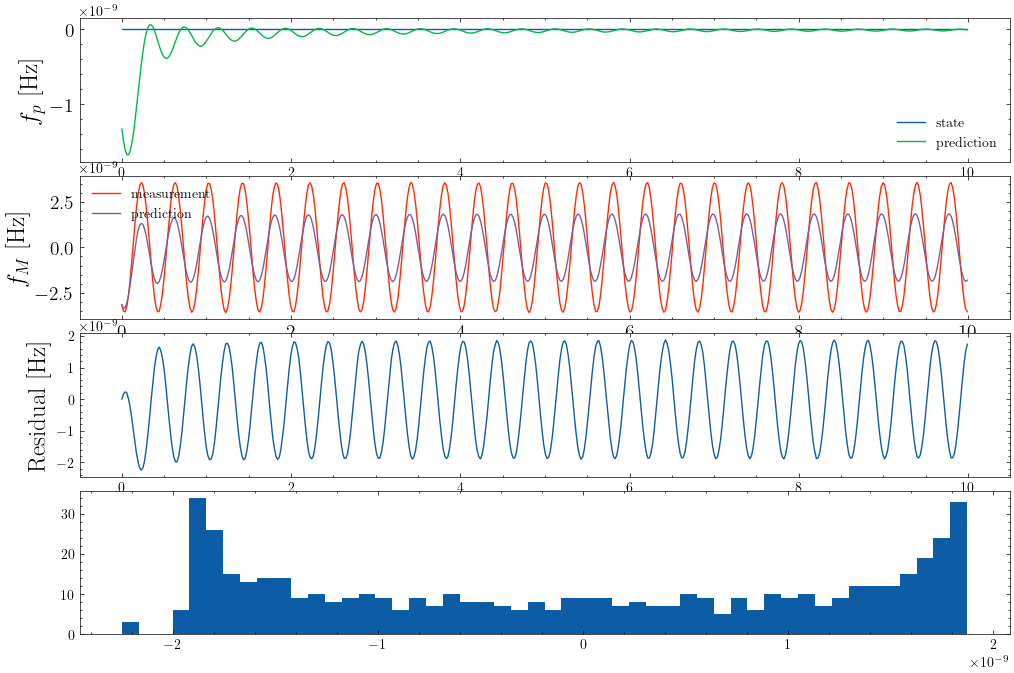

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1234
INFO:root:You are including the PSR terms in your synthetic data generation
INFO:root:You are using just the null measurement model


model likelihood =  -122566391.63699363
Mean residual: -8.581973083405633e-11


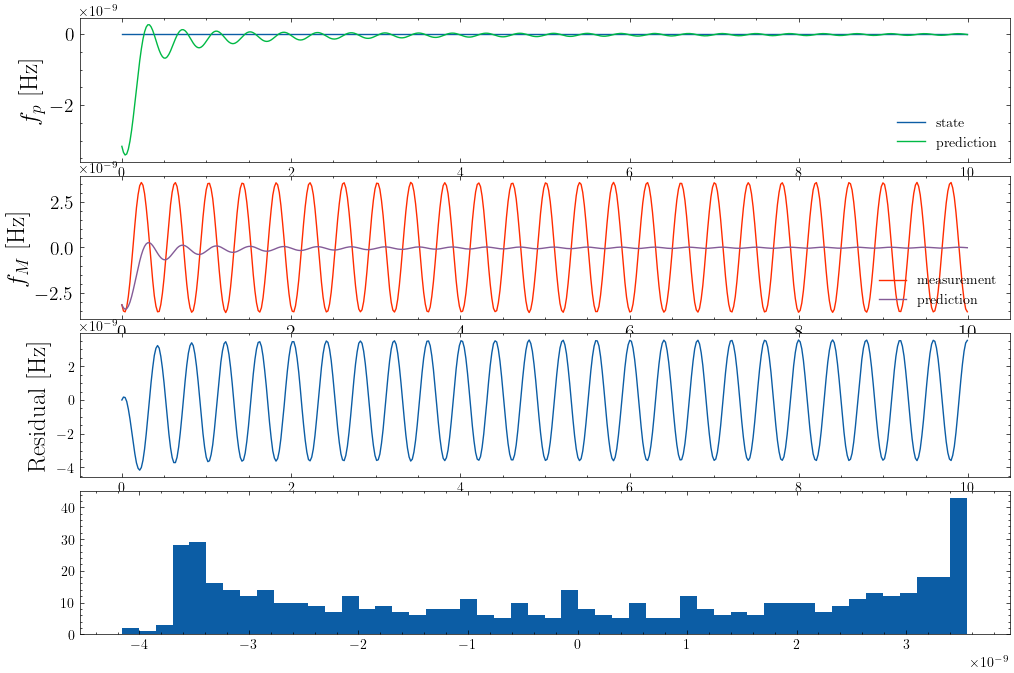

null likelihood =  -299136495.57202375
Likelihood ratio: 176570103.9350301


In [14]:
P   = SystemParameters(h=h,σp=1e-20,σm=1e-11,measurement_model="earth")
PTA = Pulsars(P)               # setup the PTA
data = SyntheticData(PTA,P) # generate some synthetic data



#Define the model 
model = LinearModel(P)


#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)


#Run the KF once with the correct parameters.
#This allows JIT precompile
guessed_parameters = priors_dict(PTA,P)
model_likelihood,xp,yp = KF.likelihood(guessed_parameters)

plot_all(PTA.t, data.intrinsic_frequency, data.f_measured, xp,yp, 1,savefig=None)

print("model likelihood = ", model_likelihood)



##########################################


P   = SystemParameters(h=h,σp=1e-20,σm=1e-11,measurement_model="null")
PTA = Pulsars(P)               # setup the PTA
data = SyntheticData(PTA,P) # generate some synthetic data



#Define the model 
model = LinearModel(P)


#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)


#Run the KF once with the correct parameters.
#This allows JIT precompile
guessed_parameters = priors_dict(PTA,P)
null_likelihood,xp,yp = KF.likelihood(guessed_parameters)

plot_all(PTA.t, data.intrinsic_frequency, data.f_measured, xp,yp, 1,savefig=None)






print("null likelihood = ", null_likelihood)




print('Likelihood ratio:', model_likelihood - null_likelihood)








## $h = 10^{-15}$

In [17]:
h = 1e-16

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1234
INFO:root:You are including the PSR terms in your synthetic data generation
INFO:root:You are using the Earth terms measurement model


Mean residual: 6.853110338740429e-13


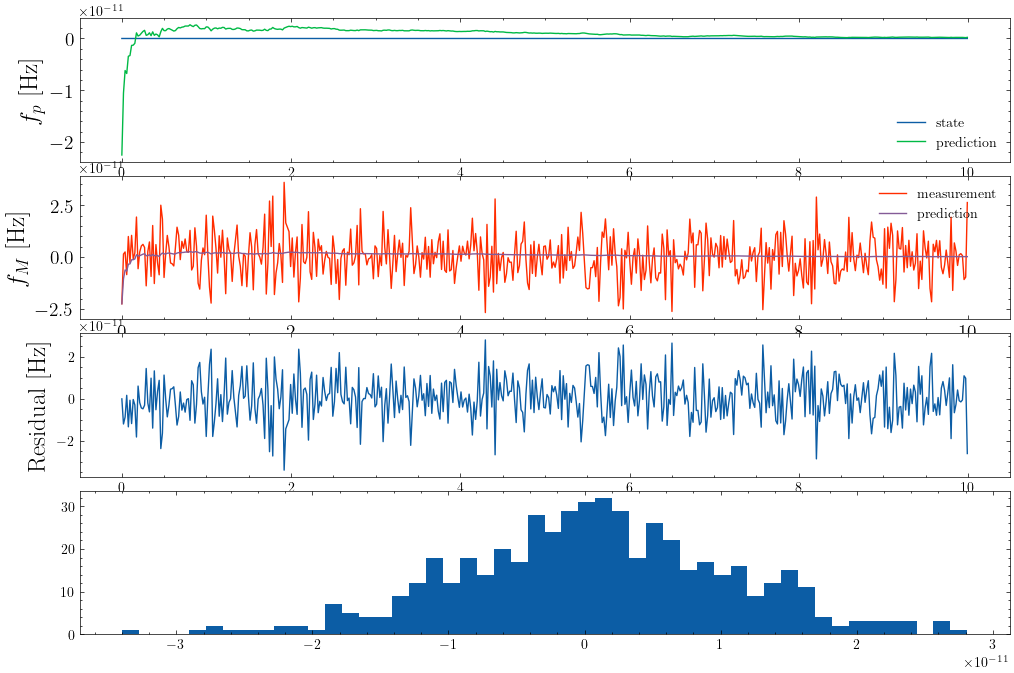

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1234
INFO:root:You are including the PSR terms in your synthetic data generation
INFO:root:You are using just the null measurement model


model likelihood =  585912.0456163049
Mean residual: 6.850121905803613e-13


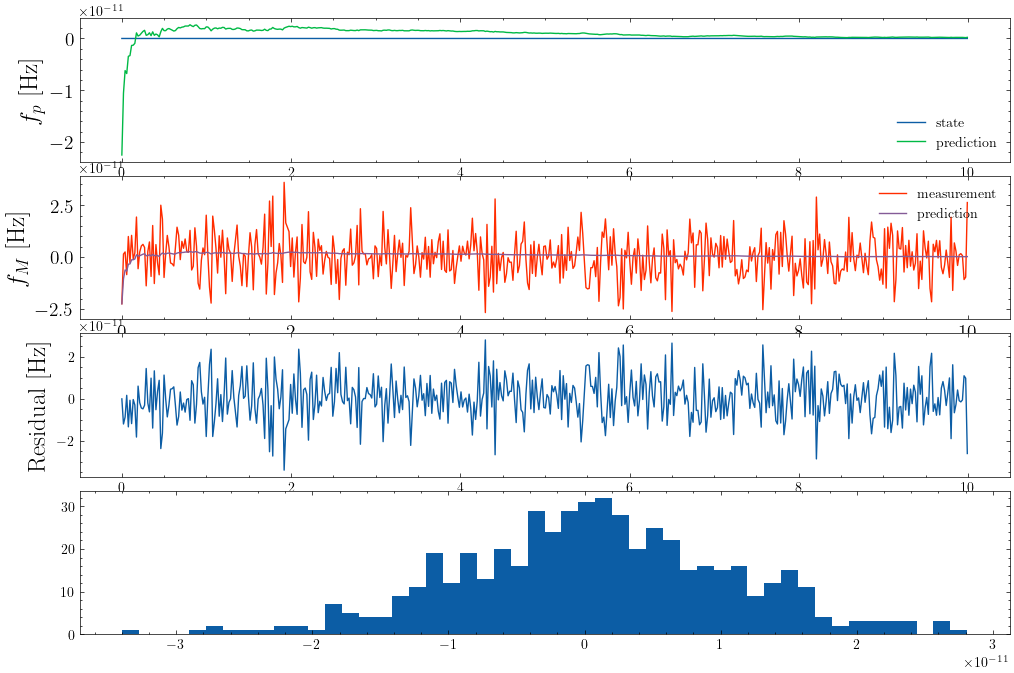

null likelihood =  585912.0431355328
Likelihood ratio: 0.002480772091075778


In [18]:
P   = SystemParameters(h=h,σp=1e-20,σm=1e-11,measurement_model="earth")
PTA = Pulsars(P)               # setup the PTA
data = SyntheticData(PTA,P) # generate some synthetic data



#Define the model 
model = LinearModel(P)


#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)


#Run the KF once with the correct parameters.
#This allows JIT precompile
guessed_parameters = priors_dict(PTA,P)
model_likelihood,xp,yp = KF.likelihood(guessed_parameters)

plot_all(PTA.t, data.intrinsic_frequency, data.f_measured, xp,yp, 1,savefig=None)

print("model likelihood = ", model_likelihood)



##########################################


P   = SystemParameters(h=h,σp=1e-20,σm=1e-11,measurement_model="null")
PTA = Pulsars(P)               # setup the PTA
data = SyntheticData(PTA,P) # generate some synthetic data



#Define the model 
model = LinearModel(P)


#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)


#Run the KF once with the correct parameters.
#This allows JIT precompile
guessed_parameters = priors_dict(PTA,P)
null_likelihood,xp,yp = KF.likelihood(guessed_parameters)

plot_all(PTA.t, data.intrinsic_frequency, data.f_measured, xp,yp, 1,savefig=None)






print("null likelihood = ", null_likelihood)




print('Likelihood ratio:', model_likelihood - null_likelihood)






